In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('daily-min-temperatures.csv', index_col='Date', parse_dates=['Date'])
df.index = df.index.to_period('D').to_timestamp() 
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [41]:
df.shape

(3650, 1)

In [42]:
df.columns

Index(['Temp'], dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [44]:
df.isnull().sum()

Temp    0
dtype: int64

In [45]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [46]:
df.dtypes

Temp    float64
dtype: object

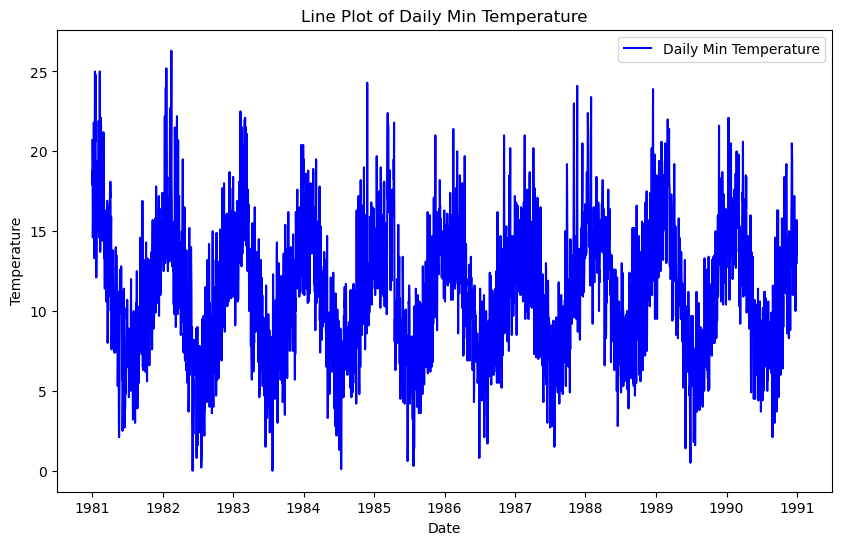

In [47]:
# Line plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Temp'], label='Daily Min Temperature', color='blue')
plt.title('Line Plot of Daily Min Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

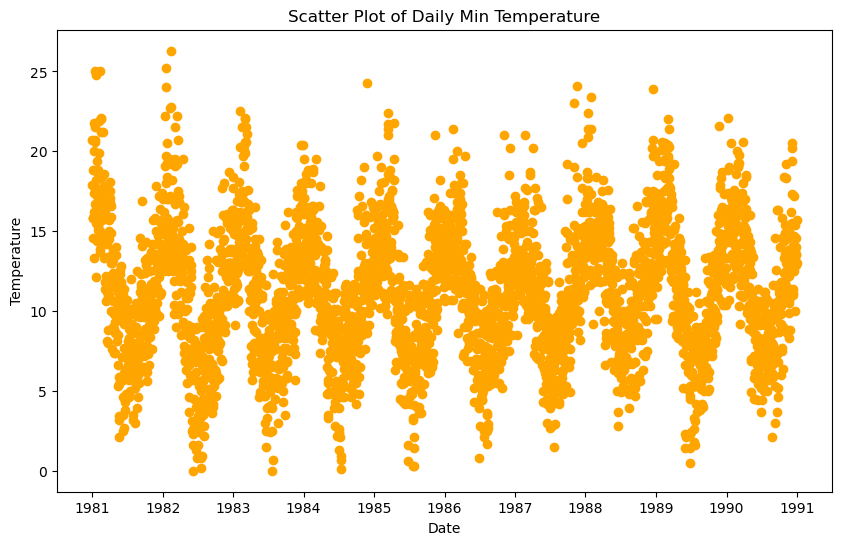

In [48]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Temp'], color='orange')
plt.title('Scatter Plot of Daily Min Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

<Figure size 1000x600 with 0 Axes>

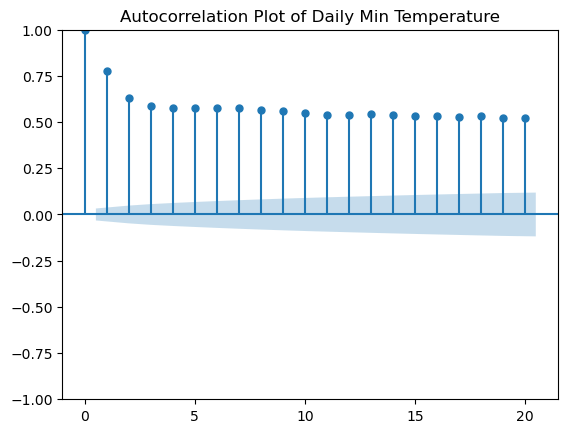

In [49]:
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelation plot
plt.figure(figsize=(10, 6))
plot_acf(df['Temp'], lags=20)
plt.title('Autocorrelation Plot of Daily Min Temperature')
plt.show()

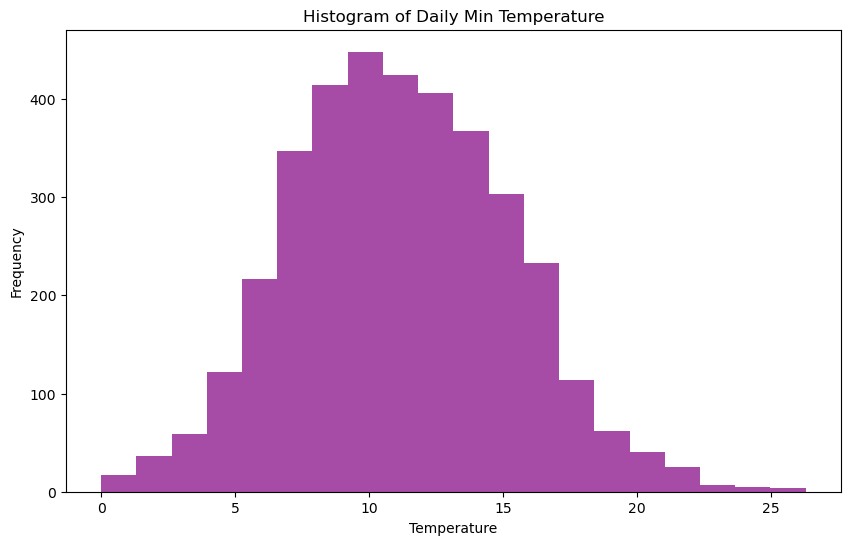

In [52]:
#Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Temp'], bins=20, color='purple', alpha=0.7)
plt.title('Histogram of Daily Min Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


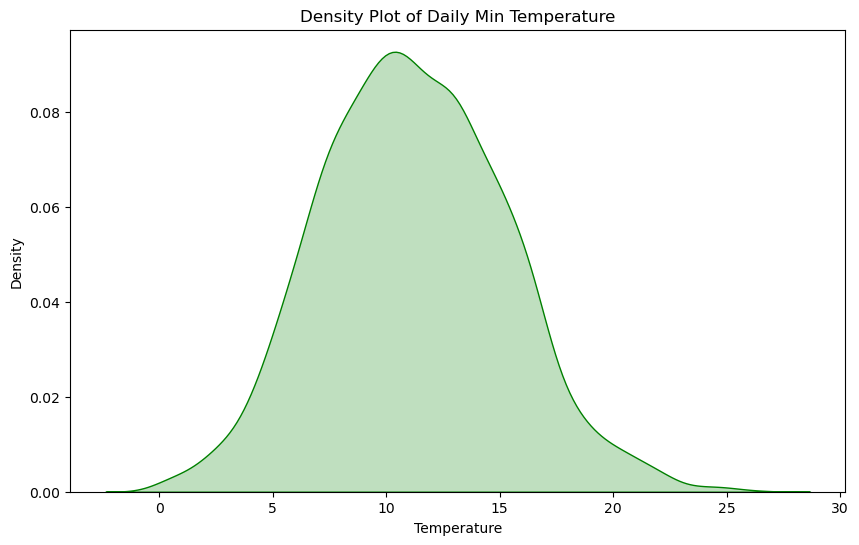

In [53]:
# Density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Temp'], fill=True, color='green')
plt.title('Density Plot of Daily Min Temperature')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.show()

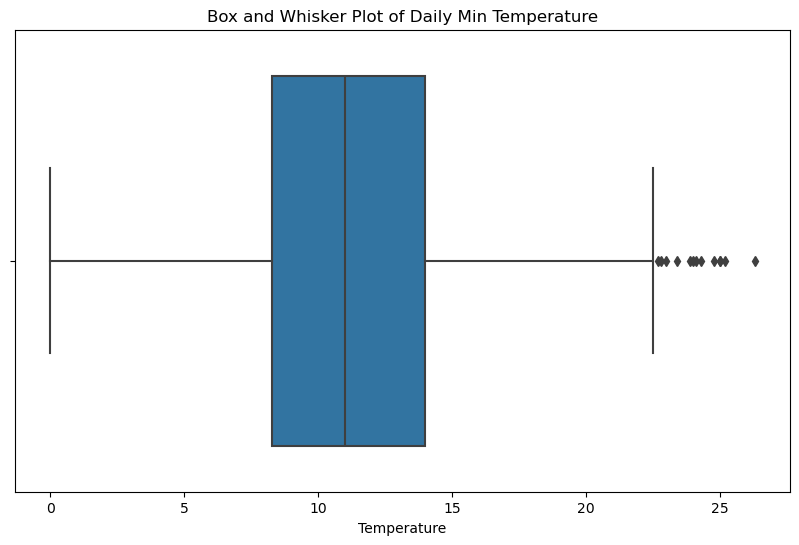

In [54]:
#Box and Whisker Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Temp'])
plt.title('Box and Whisker Plot of Daily Min Temperature')
plt.xlabel('Temperature')
plt.show()

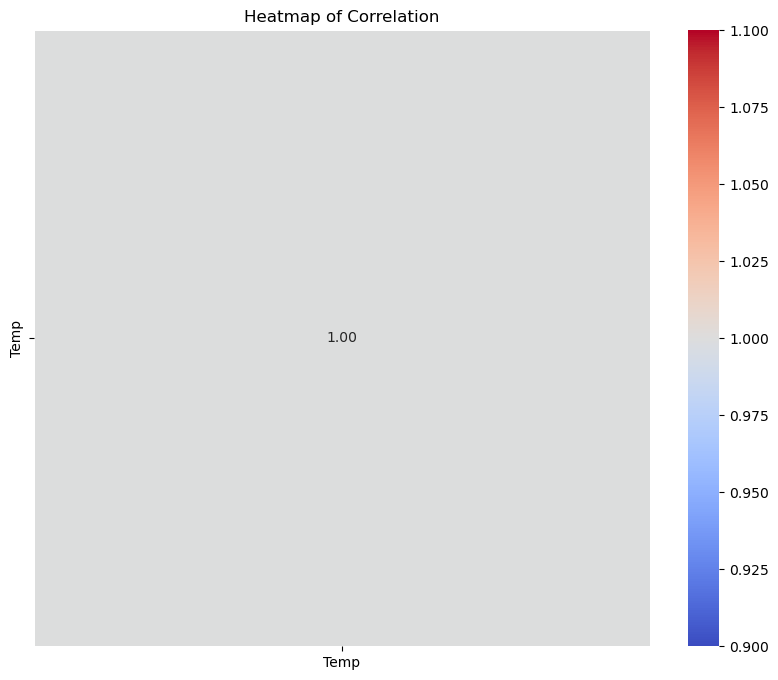

In [55]:
#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f', linewidths=.5)
plt.title('Heatmap of Correlation')
plt.show()

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

df.index = pd.to_datetime(df.index) 
df = df.asfreq('D') 
df['Temp'] = df['Temp'].dropna()
decomposition = seasonal_decompose(df['Temp'], model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid



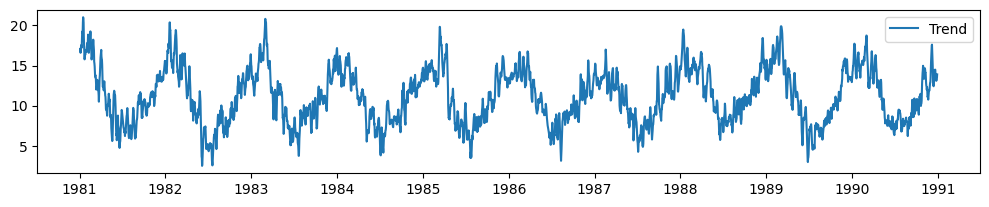

In [70]:
#Trend
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

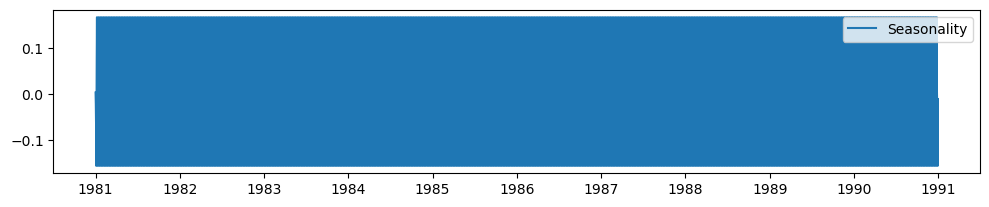

In [71]:
#Seasonality
plt.figure(figsize=(10, 8))
plt.subplot(412)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

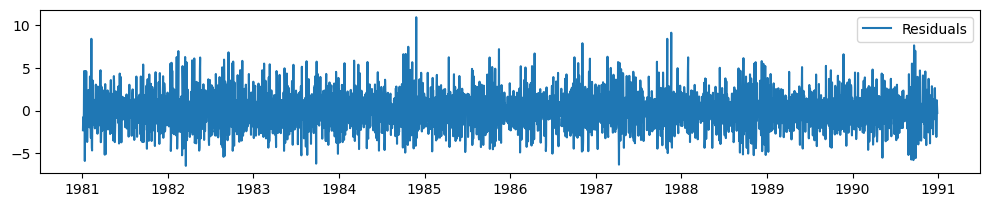

In [72]:
#Residuals
plt.figure(figsize=(10, 8))
plt.subplot(413)
plt.plot(residuals, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()